# XEFI
### An example of generating a basic XEFI for a mutlilayer interface, consisting of Vacuum, Polystyrene (C8H8), P3HT (C10H14S) and Silicon (Si).

In [1]:
import XEFI
import kkcalc as kk
import numpy as np

##### Get the refractive indexes. Can be functions of beam energy, or a list of constants for each layer, for each energy.

In [2]:
refractive_db = kk.models.asp_db_complex
refractive_air = 1.0 + 0j
refractive_P3HT = refractive_db("C10H14S", density=1.33, name="P3HT")
refractive_PS = refractive_db("C8H8", density=1.05, name="PS")
refractive_Si = refractive_db("Si", density=2.329, name="Si")

C:\Github\kkcalc\kkcalc\models\common.py:402: UserWarning: Setting a formula mass will not be internally used when a `stoichiometry` has been assigned.
  warnings.warn(
C:\Github\kkcalc\kkcalc\models\polynomials.py:1912: UserWarning: When generating `asp_complex`, the energy intervals of real (10.00, 30000.00) and imaginary (10.00, 500000.00) components don't match.
  warnings.warn(
C:\Github\kkcalc\kkcalc\models\polynomials.py:1931: UserWarning: Real energies are a subset of imaginary energies, truncating imaginary energies to match real.
  warnings.warn(
C:\Github\kkcalc\kkcalc\models\polynomials.py:624: UserWarning: (ASP 'P3HT'(511 en segments, 5 coefficients.)) Energies have changed length. Coefficients set to `None`.
  warnings.warn(
C:\Github\kkcalc\kkcalc\models\polynomials.py:624: UserWarning: (ASP 'PS'(507 en segments, 5 coefficients.)) Energies have changed length. Coefficients set to `None`.
  warnings.warn(
C:\Github\kkcalc\kkcalc\models\polynomials.py:624: UserWarning: (AS

In [3]:
# Wavelength / Beam Energy
wav = 1.54  # Å
beam_energy = (XEFI.models.basic.en2wav) / wav  # in eV
print(f"{beam_energy:0.2f} eV")

# Angles of Incidence
angles = np.linspace(0.1, 0.4, 3000)  # in degrees

# Interfaces / Thicknesses
z = [
    0,
    -800,
    -1340,
]  # Z-coordinates for the multilayer interface

# Refractive indexes
refractive_indicies: list[kk.models.asp_complex] = [
    refractive_air,
    refractive_PS,
    refractive_P3HT,
    refractive_Si,
]

# Layer names
labels = ["Air"] + [ref.name for ref in refractive_indicies[1:]]

8050.92 eV


### With Roughness

In [4]:
result = XEFI.XEF_Sliced(
    energies=beam_energy,
    angles=angles,
    z=z,
    refractive_indices=refractive_indicies,
    z_roughness=[40, 20, 5],
    slice_thickness=1.0,
    sigmas=4.0,
    layer_names=labels,
    method=XEFI.XEF_method.DEV,
)

Text(0.5, 1.0, 'X-ray Electric Field Intensity at $\\lambda$=1.54 Å, 8050.92 eV')

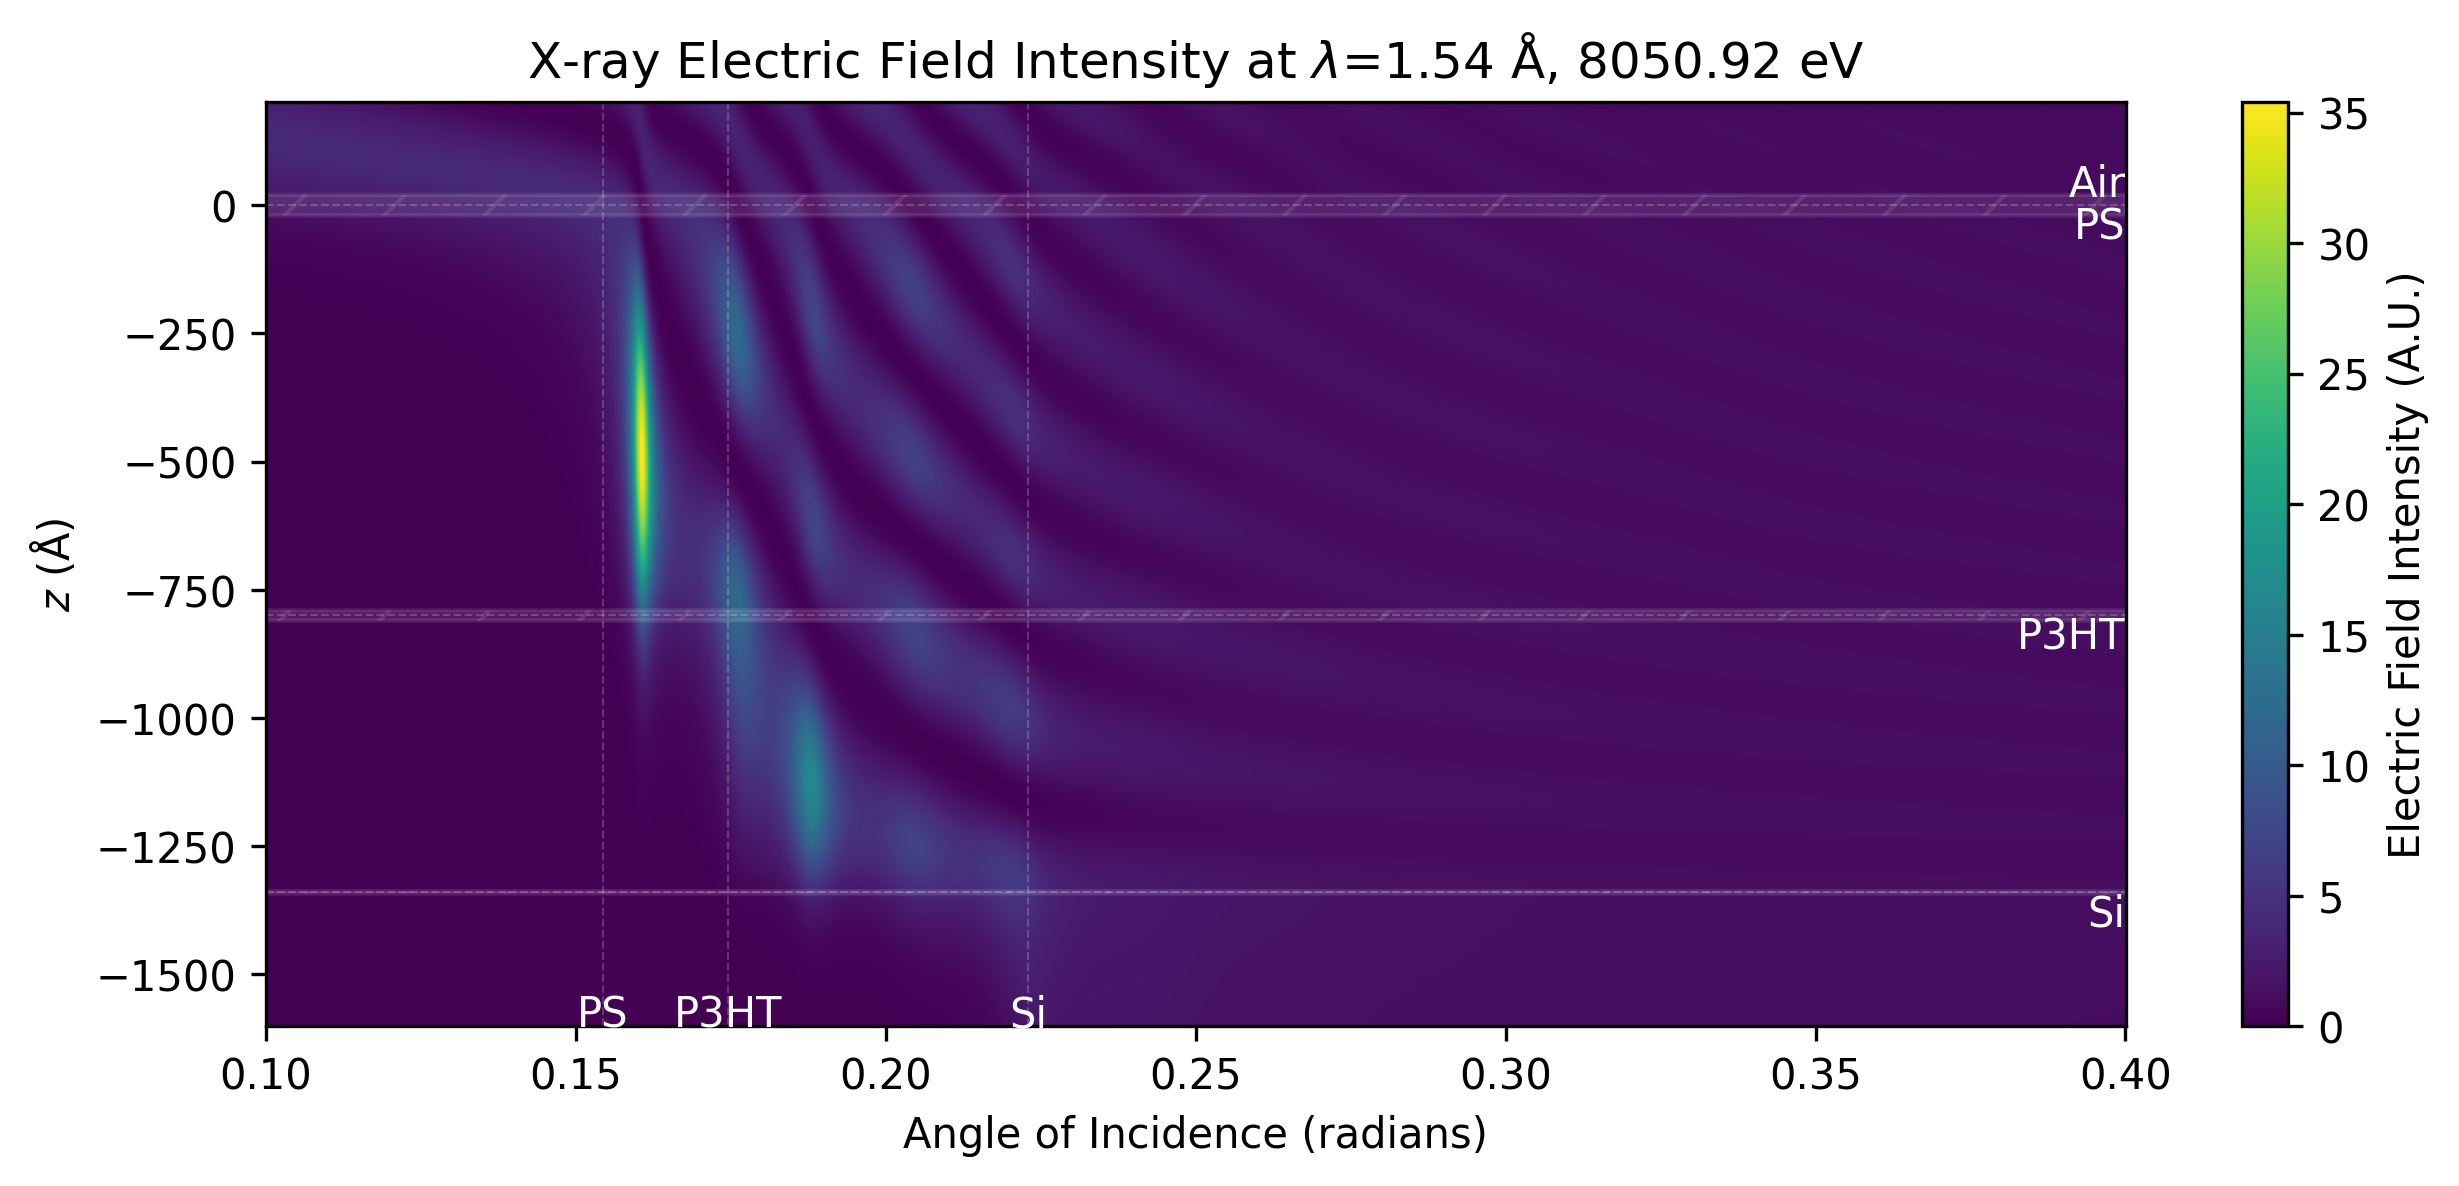

In [5]:
z_vals = np.linspace(200, -1600, 1000)
# norm = mc.LogNorm(vmin=1e-6, vmax=10)
# norm = mc.Normalize(vmin=0, vmax=10)
# fig,ax = result.generate_pretty_figure_XEFI(z_vals, norm=norm)
fig, ax = result.generate_pretty_figure_XEFI(
    z_vals, grid_roughness=True, angles_in_deg=False
)
ax.set_title(
    rf"X-ray Electric Field Intensity at $\lambda$={wav} Å, {beam_energy:0.2f} eV"
)

See other properties

In [ ]:
result.graph_refractive_indexes()